# Modules loading

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
from pathlib import Path

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings

In [3]:
QUANTILES = np.linspace(0, 1, 10000)
display(QUANTILES[:10])
display(QUANTILES[-10:])

array([0.        , 0.00010001, 0.00020002, 0.00030003, 0.00040004,
       0.00050005, 0.00060006, 0.00070007, 0.00080008, 0.00090009])

array([0.99909991, 0.99919992, 0.99929993, 0.99939994, 0.99949995,
       0.99959996, 0.99969997, 0.99979998, 0.99989999, 1.        ])

In [4]:
BASE_FOLDER = Path("..", "base").resolve()
# BASE_FOLDER = Path("base").resolve()

assert BASE_FOLDER.exists()

display(BASE_FOLDER)

PosixPath('/home/miltondp/projects/labs/greenelab/clustermatch_gene_modules/base')

In [5]:
OUTPUT_DIR_CM = Path(BASE_FOLDER, "results", "clustermatch", "enrichment").resolve()
display(OUTPUT_DIR_CM)
assert OUTPUT_DIR_CM.exists()

PosixPath('/home/miltondp/projects/labs/greenelab/clustermatch_gene_modules/base/results/clustermatch/enrichment')

In [6]:
OUTPUT_DIR_PE = Path(BASE_FOLDER, "results", "pearson", "enrichment").resolve()
display(OUTPUT_DIR_PE)
assert OUTPUT_DIR_PE.exists()

PosixPath('/home/miltondp/projects/labs/greenelab/clustermatch_gene_modules/base/results/pearson/enrichment')

# Load enrichment results

In [7]:
all_files = list(OUTPUT_DIR_CM.glob("*.pkl")) + list(OUTPUT_DIR_PE.glob("*.pkl"))

In [8]:
display(len(all_files))
assert len(all_files) == int(2 * 126)

252

In [9]:
all_results = []

for f_full in all_files:
#     print(f)
    
    f = f_full.name
    
    fsplit = str(f).split("-")
    k = int(fsplit[0].split("_")[1])
    method = fsplit[1]
    gene_sets = fsplit[2]
    gene_sets_ont = fsplit[3]
    results_type = fsplit[4].split(".")[0]
    
    data = pd.read_pickle(f_full)
    
    data = data.assign(**{
        "k": k,
        "method": method,
        "gene_sets": gene_sets,
        "ont": gene_sets_ont,
        "results_type": results_type,
    })
    
    data["Cluster"] = data["Cluster"].astype("category")
    data["k"] = data["k"].astype("category")
    data["method"] = data["method"].astype("category")
    data["gene_sets"] = data["gene_sets"].astype("category")
    data["ont"] = data["ont"].astype("category")
    data["results_type"] = data["results_type"].astype("category")
    
    all_results.append(data)

In [10]:
len(all_results)

252

In [11]:
all_results_df = pd.concat(all_results, ignore_index=True)

In [12]:
all_results_df.shape

(293882, 15)

In [13]:
all_results_df.head()

,Cluster,ID,Description,GeneRatio,BgRatio,pvalue,p.adjust,qvalue,geneID,Count,k,method,gene_sets,ont,results_type
0,C68,GO:0006614,SRP-dependent cotranslational protein targetin...,28/31,120/20610,3.903985e-61,9.994202e-59,7.684687e-59,RPL32/RPL12/RPS19/RPL36/RPL28/RPL13A/RPL19/RPS...,28,90,clustermatch,enrichGO,BP,full
1,C68,GO:0006613,cotranslational protein targeting to membrane,28/31,124/20610,1.101866e-60,1.410389e-58,1.084469e-58,RPL32/RPL12/RPS19/RPL36/RPL28/RPL13A/RPL19/RPS...,28,90,clustermatch,enrichGO,BP,full
2,C68,GO:0045047,protein targeting to ER,28/31,134/20610,1.259574e-59,1.074836e-57,8.264570e-58,RPL32/RPL12/RPS19/RPL36/RPL28/RPL13A/RPL19/RPS...,28,90,clustermatch,enrichGO,BP,full
3,C68,GO:0072599,establishment of protein localization to endop...,28/31,138/20610,3.153722e-59,2.018382e-57,1.551963e-57,RPL32/RPL12/RPS19/RPL36/RPL28/RPL13A/RPL19/RPS...,28,90,clustermatch,enrichGO,BP,full
4,C68,GO:0000184,"nuclear-transcribed mRNA catabolic process, no...",28/31,145/20610,1.466372e-58,7.507824e-57,5.772874e-57,RPL32/RPL12/RPS19/RPL36/RPL28/RPL13A/RPL19/RPS...,28,90,clustermatch,enrichGO,BP,full


# QQ-plot of $p$-values TESTING

In [14]:
# def get_quantiles(data):
#     return pd.Series(-np.log10(data["p.adjust"])).quantile(QUANTILES).rename("quantile")

In [15]:
# plot_df = all_results_df.groupby(["method", "k", "ont", "results_type"]).apply(get_quantiles).stack().rename("p.adjust").reset_index()

In [16]:
# plot_df.shape

In [17]:
# plot_df.head()

In [18]:
# fig, ax = plt.subplots(figsize=(10, 8))

# sns.scatterplot(
#     data=plot_df[plot_df["ont"] == "BP"],
#     x="quantile",
#     y="p.adjust",
#     hue="method",
#     ax=ax,
# )

# # ax.set_xlabel(None)
# # ax.set_ylabel(None)

# # min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
# # max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
# # ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

# # plt.legend()

# QQ-plot of $p$-values (full set)

In [19]:
_df_common = all_results_df[all_results_df["results_type"] == "full"]
_clustermatch_values = _df_common[_df_common["method"] == "clustermatch"]["p.adjust"]
_pearson_values = _df_common[_df_common["method"] == "pearson"]["p.adjust"]

In [20]:
# quantiles_df = pd.DataFrame(
#     {
#         "clustermatch": -np.log10(_clustermatch_values.quantile(QUANTILES)),
#         "pearson": -np.log10(_pearson_values.quantile(QUANTILES)),
#     }
# )

In [21]:
quantiles_df = pd.DataFrame(
    {
        "clustermatch": pd.Series(-np.log10(_clustermatch_values)).quantile(QUANTILES),
        "pearson": pd.Series(-np.log10(_pearson_values)).quantile(QUANTILES),
    }
)

In [22]:
quantiles_df.shape

(10000, 2)

In [23]:
quantiles_df.head()

,clustermatch,pearson
0.0000,1.301034,1.301042
0.0001,1.301046,1.301129
0.0002,1.301052,1.301259
0.0003,1.301140,1.301347
0.0004,1.301273,1.301363


Text(0.5, 1.0, 'Gene Ontology (full)')

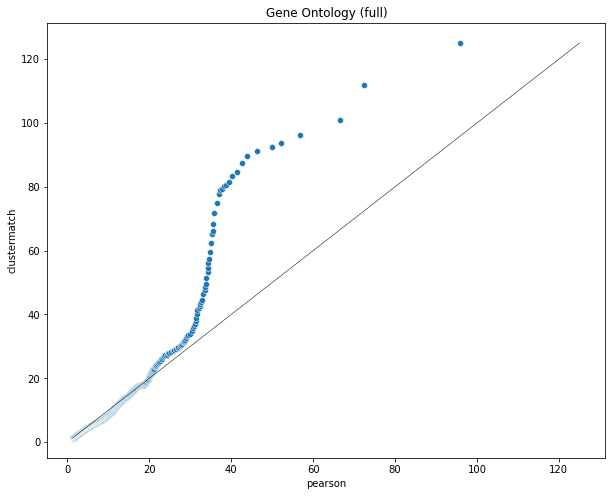

In [24]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson",
    y="clustermatch",
    ax=ax,
)

# ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title("Gene Ontology (full)")

# plt.legend()

# QQ-plot of $p$-values (simplified set)

In [25]:
_df_common = all_results_df[all_results_df["results_type"] == "simplified"]
_clustermatch_values = _df_common[_df_common["method"] == "clustermatch"]["p.adjust"]
_pearson_values = _df_common[_df_common["method"] == "pearson"]["p.adjust"]

In [26]:
# quantiles_df = pd.DataFrame(
#     {
#         "clustermatch": -np.log10(_clustermatch_values.quantile(QUANTILES)),
#         "pearson": -np.log10(_pearson_values.quantile(QUANTILES)),
#     }
# )

In [27]:
quantiles_df = pd.DataFrame(
    {
        "clustermatch": pd.Series(-np.log10(_clustermatch_values)).quantile(QUANTILES),
        "pearson": pd.Series(-np.log10(_pearson_values)).quantile(QUANTILES),
    }
)

In [28]:
# quantiles_df[quantiles_df > 5] = np.nan

In [29]:
quantiles_df.shape

(10000, 2)

In [30]:
quantiles_df.head()

,clustermatch,pearson
0.0000,1.301039,1.301108
0.0001,1.301106,1.301334
0.0002,1.301202,1.301347
0.0003,1.301218,1.301347
0.0004,1.301630,1.301347


Text(0.5, 1.0, 'Gene Ontology (simplified)')

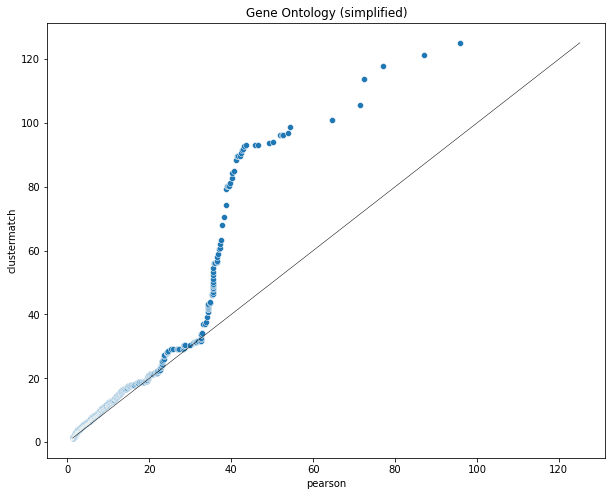

In [31]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson",
    y="clustermatch",
    ax=ax,
)

# ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title("Gene Ontology (simplified)")

# plt.legend()

# QQ-plot of $p$-values (simplified set + BP)

In [32]:
_df_common = all_results_df[
    (all_results_df["results_type"] == "simplified")
    & (all_results_df["ont"] == "BP")
]
_clustermatch_values = _df_common[_df_common["method"] == "clustermatch"]["p.adjust"]
_pearson_values = _df_common[_df_common["method"] == "pearson"]["p.adjust"]

In [33]:
quantiles_df = pd.DataFrame(
    {
        "clustermatch": pd.Series(-np.log10(_clustermatch_values)).quantile(QUANTILES),
        "pearson": pd.Series(-np.log10(_pearson_values)).quantile(QUANTILES),
    }
)

In [34]:
# quantiles_df[quantiles_df > 5] = np.nan

In [35]:
quantiles_df.shape

(10000, 2)

In [36]:
quantiles_df.head()

,clustermatch,pearson
0.0000,1.301153,1.301137
0.0001,1.301195,1.302032
0.0002,1.301202,1.302561
0.0003,1.301442,1.302907
0.0004,1.301692,1.303297


Text(0.5, 1.0, 'Gene Ontology (simplified + BP)')

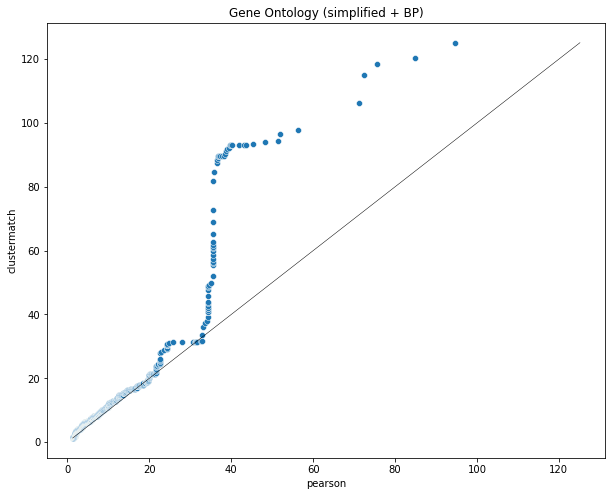

In [37]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson",
    y="clustermatch",
    ax=ax,
)

# ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title("Gene Ontology (simplified + BP)")

# plt.legend()

# QQ-plot of $p$-values (simplified set + CC)

In [38]:
_df_common = all_results_df[
    (all_results_df["results_type"] == "simplified")
    & (all_results_df["ont"] == "CC")
]
_clustermatch_values = _df_common[_df_common["method"] == "clustermatch"]["p.adjust"]
_pearson_values = _df_common[_df_common["method"] == "pearson"]["p.adjust"]

In [39]:
quantiles_df = pd.DataFrame(
    {
        "clustermatch": pd.Series(-np.log10(_clustermatch_values)).quantile(QUANTILES),
        "pearson": pd.Series(-np.log10(_pearson_values)).quantile(QUANTILES),
    }
)

In [40]:
# quantiles_df[quantiles_df > 5] = np.nan

In [41]:
quantiles_df.shape

(10000, 2)

In [42]:
quantiles_df.head()

,clustermatch,pearson
0.0000,1.301039,1.301108
0.0001,1.301039,1.301520
0.0002,1.301039,1.301932
0.0003,1.301039,1.302344
0.0004,1.301160,1.303568


Text(0.5, 1.0, 'Gene Ontology (simplified + CC)')

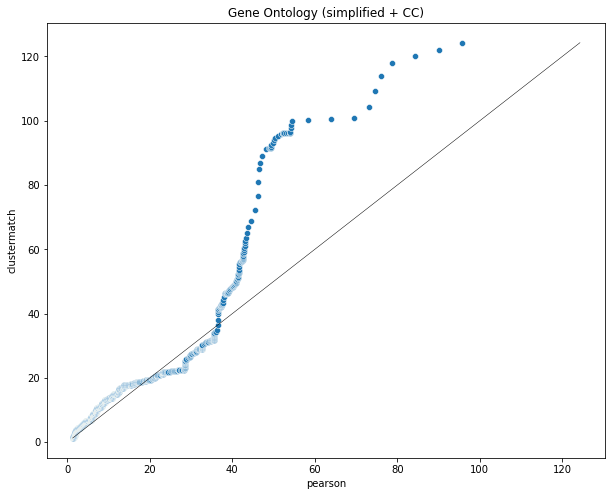

In [43]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson",
    y="clustermatch",
    ax=ax,
)

# ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title("Gene Ontology (simplified + CC)")

# plt.legend()

# QQ-plot of $p$-values (simplified set + MF)

In [44]:
_df_common = all_results_df[
    (all_results_df["results_type"] == "simplified")
    & (all_results_df["ont"] == "MF")
]
_clustermatch_values = _df_common[_df_common["method"] == "clustermatch"]["p.adjust"]
_pearson_values = _df_common[_df_common["method"] == "pearson"]["p.adjust"]

In [45]:
quantiles_df = pd.DataFrame(
    {
        "clustermatch": pd.Series(-np.log10(_clustermatch_values)).quantile(QUANTILES),
        "pearson": pd.Series(-np.log10(_pearson_values)).quantile(QUANTILES),
    }
)

In [46]:
# quantiles_df[quantiles_df > 5] = np.nan

In [47]:
quantiles_df.shape

(10000, 2)

In [48]:
quantiles_df.head()

,clustermatch,pearson
0.0000,1.301222,1.301347
0.0001,1.301536,1.301347
0.0002,1.301849,1.301347
0.0003,1.302114,1.301347
0.0004,1.302356,1.301347


Text(0.5, 1.0, 'Gene Ontology (simplified + MF)')

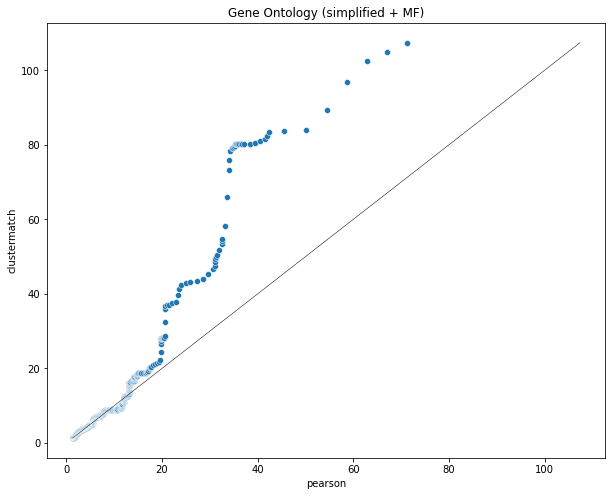

In [49]:
fig, ax = plt.subplots(figsize=(10, 8))

sns.scatterplot(
    data=quantiles_df,
    x="pearson",
    y="clustermatch",
    ax=ax,
)

# ax.set_xlabel(None)
# ax.set_ylabel(None)

min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

ax.set_title("Gene Ontology (simplified + MF)")

# plt.legend()

# Plot unique GO terms

In [53]:
plot_df = all_results_df.groupby(["method", "k", "results_type"])['ID'].nunique().rename("count").reset_index()

In [54]:
plot_df.shape

(84, 4)

In [55]:
plot_df.head()

,method,k,results_type,count
0,clustermatch,2,full,2459
1,clustermatch,2,simplified,67
2,clustermatch,5,full,2285
3,clustermatch,5,simplified,113
4,clustermatch,10,full,2629


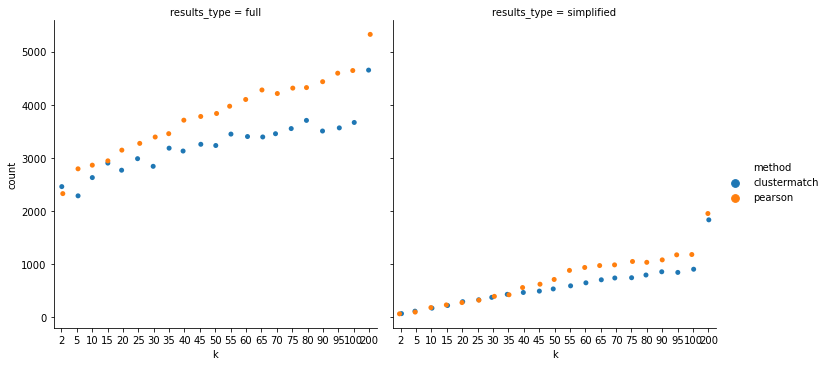

In [56]:
# fig, ax = plt.subplots(figsize=(10, 8))

sns.catplot(
    data=plot_df,
    x="k",
    y="count",
    hue="method",
    col="results_type",
#     ax=ax,
)

# ax.set_xlabel(None)
# ax.set_ylabel(None)

# min_val = min((quantiles_df.iloc[:, 0].min(), quantiles_df.iloc[:, 1].min()))
# max_val = max((quantiles_df.iloc[:, 0].max(), quantiles_df.iloc[:, 1].max()))
# ax.plot([min_val, max_val], [min_val, max_val], "k", linewidth=0.5)

# plt.legend()

# Intersection of terms

In [54]:
from upsetplot import UpSet

In [263]:
UpSet?

Init signature:
UpSet(
    data,
    orientation='horizontal',
    sort_by='degree',
    sort_categories_by='cardinality',
    subset_size='auto',
    sum_over=None,
    facecolor='black',
    with_lines=True,
    element_size=32,
    intersection_plot_elements=6,
    totals_plot_elements=2,
    show_counts='',
    show_percentages=False,
)
Docstring:     
Manage the data and drawing for a basic UpSet plot

Primary public method is :meth:`plot`.

Parameters
----------
data : pandas.Series or pandas.DataFrame
    Elements associated with categories (a DataFrame), or the size of each
    subset of categories (a Series).
    Should have MultiIndex where each level is binary,
    corresponding to category membership.
    If a DataFrame, `sum_over` must be a string or False.
orientation : {'horizontal' (default), 'vertical'}
    If horizontal, intersections are listed from left to right.
sort_by : {'cardinality', 'degree'}
    If 'cardinality', subset are listed from largest to smallest.
  

In [260]:
_df_common = all_results_df[
    (all_results_df["results_type"] == "simplified")
]

In [264]:
plot_df = pd.DataFrame({
    "clustermatch": _df_common["method"] == "clustermatch",
    "clustermatch": _df_common["method"] == "pearson",
})

In [265]:
plot_df

,clustermatch
13126,True
13127,True
13128,True
13129,True
13130,True
...,...
292986,False
292987,False
292988,False
292989,False


In [116]:
plot_df.unstack()

ont,BP,CC,MF
method,,,
clustermatch,99546,21239,17570
pearson,116843,18777,19907


In [114]:
plot(plot_df)

ValueError: The DataFrame has values in its index that are not boolean

In [109]:
df = all_results_df[all_results_df["results_type"] == "full"][["method", "ont"]]

In [103]:
df.shape

(258627, 2)

In [104]:
df.head()

,method,ont
0,clustermatch,BP
1,clustermatch,BP
2,clustermatch,BP
3,clustermatch,BP
4,clustermatch,BP
